# BITS F312 | NNFL | Python Tutorial

Adapted from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

## Introduction

In these two days we will cover a few essential tools required by data-scientists, machine-learning engineers and NNFL students

In today's session, we will cover:

* Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Object Oriented and Functional Programming
* Other Useful Pointers and Guidelines

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [124]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


or, we could just do this

In [125]:
sorted([3,6,8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 10]

It internally uses an algorithm called 'Timsort' for sorting.

### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [126]:
x = 3

In [127]:
type(x)

int

In [128]:
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [129]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

4
8


In [130]:
y = 2.5
print(type(y)) # Prints "<type 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [131]:
t, f = True, False
print(type(t)) # Prints "<type 'bool'>"

<class 'bool'>


Yes, we can assign like that :D

In [132]:
a = 1
b = 2

In [133]:
a,b = b,a

In [134]:
print(a,b)

2 1


Now we let's look at the operations:

In [135]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [136]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello), len(hello)

hello


(None, 5)

In [137]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


String objects have a bunch of useful methods; for example:

In [138]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [139]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [140]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)


[3, 1, 'foo']


In [141]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [142]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [143]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops

You can loop over the elements of a list like this:

In [144]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [145]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [150]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

List comprehensions also offer a small speedup.

In [151]:
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [153]:
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [154]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [155]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [156]:
del d['fish'] 

In [157]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [158]:
print(d.get('monkey'))

None


In [159]:
print(d.get('monkey', 'Not there :('))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'You recently deleted it!'))    # Get an element with a default; prints "wet"

Not there :(
You recently deleted it!


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [160]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the iteritems method:

In [161]:
print(d.items())

dict_items([('person', 2), ('cat', 4), ('spider', 8)])


In [162]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [163]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [164]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [165]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [166]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))

3
2


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [167]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: fish
#2: cat
#3: dog


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [168]:
from math import sqrt
print({int(sqrt(x)) for x in list(range(30))})

{0, 1, 2, 3, 4, 5}


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [169]:
d = {(x, x + 1): x for x in list(range(10))}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [177]:
t[0] = 1 # Error because they are immutabLe

TypeError: 'tuple' object does not support item assignment

#### ZIP

In [4]:
numbers = [1, 2, 3]
words = ['one', 'two', 'three']

# Two iterables are passed
result = zip(numbers, words)

# Converting itertor to set
resultList = list(result)

print(resultList)

[(1, 'one'), (2, 'two'), (3, 'three')]


In [5]:
numbers = [1, 2, 3]
lower_words = ['one', 'two']
upper_words = ('ONE', 'TWO', 'THREE', 'FOUR')

result = zip(numbers, lower_words)

# Converting to set
resultSet = set(result)
print(resultSet)

result = zip(numbers, lower_words, upper_words)

# Converting to set
resultSet = set(result)
print(resultSet)

{(1, 'one'), (2, 'two')}
{(1, 'one', 'ONE'), (2, 'two', 'TWO')}


#### UNZIP

In [6]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5, 0, 9]

result = zip(coordinate, value)
resultList = list(result)
print(resultList)

c, v =  zip(*resultList)
print('c =', c)
print('v =', v)

[('x', 3), ('y', 4), ('z', 5)]
c = ('x', 'y', 'z')
v = (3, 4, 5)


### Functions

Python functions are defined using the `def` keyword. For example:

In [178]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [179]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


In [180]:
def myFun(*argv):  
    for arg in argv:  
        print(arg) 


In [181]:
w = "Welcome"
myFun(w, ' to ', 'CS F' , 312)  

Welcome
 to 
CS F
312


In [182]:
def myFun(*argv):  
    for arg in argv:  
        print(arg,end='')

In [6]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5, 0, 9]

result = zip(coordinate, value)
resultList = list(result)
print(resultList)

c, v =  zip(*resultList)
print('c =', c)
print('v =', v)

[('x', 3), ('y', 4), ('z', 5)]
c = ('x', 'y', 'z')
v = (3, 4, 5)


### Our Fancy Random Number Generator

In [7]:
M = 17969491597941066732916128449573246156367561808012600070888918835531726460341490933493372247868650755230855864199929221814436684722874052065257937495694348389263171152522525654410980819170611742509702440718010364831638288518852689
def blum_blum_shub():
    global M
    x = 987654321
    while True:
        x =  (x**2)%M
        yield round(x/M,3)
        
random = blum_blum_shub()

# Load Existing Python File

In [ ]:
%load a.py

## Revisit Concepts using an Example

In [184]:
import names
import csv
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

def get_name():
    return names.get_first_name()
def range_random(l,u):
    return round(l+(u-l)*next(random),3)

## Definition of a Student

In [185]:
class Student():
    name = None
    age = None
    gender = None
    grade = None
    def __init__(self, age, name, grade):
        self.age = age
        self.name = name
        self.grade = grade

## Definition of a EEE Student

In [186]:
class EEE_Student(Student):
    """
    A EEE student: behaves exactly like a Student 
    but also has a special discipline class attribute and a couple courses
    """
    discipline = "A3"
    courses = ["Control Systems, Optimisation"]
    def __init__(self, age, name):
        super().__init__(age, name, range_random(5,9))

## Definition of a CSE Student

In [187]:
class CSE_Student(Student):
    """
    A CSE student: behaves exactly like a Student 
    but also has a special discipline class attribute and a couple courses
    """
    discipline = "A7"
    courses = ["Data Structures, OOP"]
    def __init__(self, age, name):
        super().__init__(age, name, range_random(6,10))

__Generate List of Students__

In [188]:
cse_students = [CSE_Student(range_random(18,23), get_name()) for i in range(0,100000)]
eee_students = [EEE_Student(range_random(18,23), get_name()) for i in range(0,100000)]

In [189]:
len(cse_students)

100000

In [190]:
len(eee_students)

100000

__Concat List of Students__

In [191]:
all_students = cse_students+eee_students

In [192]:
len(all_students)

200000

__Get Student Names with Count__

In [193]:
name_counts = {}
def update_dict(name):
    global name_counts
    name_counts[name] = name_counts.get(name, 0)+1
    
compute_name_counts = list(map(lambda x: update_dict(x.name), all_students))

In [196]:
name_counts

{'John': 3646,
 'Tillie': 9,
 'Kenneth': 942,
 'Gail': 184,
 'Samuel': 343,
 'Larry': 660,
 'Yvonne': 120,
 'Marilyn': 229,
 'Jeffrey': 644,
 'Leonor': 12,
 'Mary': 2948,
 'Trisha': 27,
 'Charles': 1738,
 'Cathy': 142,
 'Blaine': 21,
 'Alex': 128,
 'Lawrence': 350,
 'Vera': 109,
 'Phil': 35,
 'Corinne': 31,
 'Judy': 320,
 'Ruth': 638,
 'Gloria': 365,
 'Amelia': 62,
 'Eddie': 140,
 'Rosemary': 117,
 'Stephanie': 433,
 'Mercedes': 44,
 'Richard': 1930,
 'Lynda': 56,
 'Matthew': 735,
 'Barbara': 1121,
 'Karrie': 5,
 'Lois': 225,
 'James': 3679,
 'Irene': 264,
 'Carol': 659,
 'Nicholas': 306,
 'Wayne': 291,
 'Jeffery': 159,
 'Robert': 3454,
 'Bonnie': 241,
 'Brian': 813,
 'Tonya': 112,
 'Ralph': 286,
 'William': 2767,
 'Frank': 672,
 'Douglas': 401,
 'Peter': 429,
 'Timothy': 717,
 'Aleida': 3,
 'Valentine': 12,
 'Chester': 79,
 'Theodore': 144,
 'Nathaniel': 121,
 'Kimberly': 594,
 'Tamiko': 3,
 'Vicki': 116,
 'Melvin': 170,
 'Amanda': 448,
 'Weldon': 14,
 'Lorine': 7,
 'Melissa': 501,
 '

In [195]:
## The following line will take a long time to compute, can you guess why?
# name_repeats = reduce(lambda new_dict,x: dict(list(new_dict.items())+[(x.name,new_dict.get(x.name,0)+1)]), all_students, {} )

## Get List of Students Containing Unique Names

__A Purely Imperative Approach__

In [197]:
unique_names = set()
students_with_unique_names = []
for student in all_students:
    if student.name in unique_names:
        continue
    students_with_unique_names.append(student)
    unique_names.add(student.name)

In [198]:
len(students_with_unique_names)

4643

__Alternate Approch w/ Functional Operators__

In [199]:
''' map out the features/parameters which need to be evaluated upon '''
student_and_names = dict(map(lambda x: (x.name, x), all_students))

''' remap the set of names to a list of student objects '''
uniquely_named_students = list(map(lambda x: student_and_names[x], student_and_names))

In [200]:
len(uniquely_named_students)

4643

## Get a Sorted List of Students with CG > 9.5

__Approach 1: Filter followed by Sort__

In [119]:
meritorious_students = list(filter(lambda x: x.grade>9.5, all_students))
sorted_meritorious_students1 = sorted(meritorious_students, key=lambda x:x.grade, reverse=True)

__Approach 2: Sort followed by Filter__

In [121]:
sorted_students = sorted(all_students, key=lambda x:x.grade, reverse=True)
sorted_meritorious_students2 = list(filter(lambda x: x.grade>9.5, sorted_students))

*Why did the first approach take less time?*

## Compare the Average Grade of CSE Students and EEE Students

In [23]:
cse_average_grade = reduce(lambda x,y: x+y,map(lambda x: x.grade, filter(lambda x: x.discipline=="A7", all_students)))/len(cse_students)

In [24]:
cse_average_grade

8.00307507999992

In [25]:
eee_average_grade = reduce(lambda x,y:("",x[1]+y[1]), filter(lambda x: x[0]=="A3", map(lambda x:(x.discipline,x.grade),all_students)))[1]/len(eee_students)

In [26]:
eee_average_grade

6.9982245599999535

## CSV File

In [27]:
unrolled_data = list(map(lambda x: (x.name, x.discipline, x.grade, x.courses), all_students))

In [28]:
with open('students.csv', 'w') as studentsCsvFile:
    writer = csv.writer(studentsCsvFile)
    writer.writerow(("Name","Discipline","Grade","Courses"))
    writer.writerows(unrolled_data)

## Pickle File

In [29]:
file = open('important', 'wb')

pickle.dump(all_students,file)

file.close()

# Next Section

## Why NumPy

### Lists vs Arrays



In [40]:
import numpy as np

list_1 = range(500000)
list_2 = range(500000)

array_1 = np.arange(500000)
array_2 = np.arange(500000)

We'll compare time taken for list operations and NumPy array operations

In [47]:
import time

start = time.time()

sum_list = [a+b for a,b in zip(list_1,list_2)]

end = time.time()

print("Time taken: ",end - start)



Time taken:  0.05448508262634277


In [48]:
start = time.time()

sum_array = array_1 + array_2

end = time.time()
print("Time taken: ",end - start)



Time taken:  0.0026819705963134766


***There's a significant difference in the two times (roughly a factor of 20)***

## Why Pandas

In [201]:
df = pd.read_csv("./students.csv", header=0)
df.head(5)

,Name,Discipline,Grade,Courses
0,Linda,A7,6.000,"['Data Structures, OOP']"
1,Beatrice,A7,6.000,"['Data Structures, OOP']"
2,Shaun,A7,8.296,"['Data Structures, OOP']"
3,Rose,A7,8.232,"['Data Structures, OOP']"
4,Bryan,A7,7.760,"['Data Structures, OOP']"


In [202]:
df.shape

(200000, 4)

In [203]:
df.describe()

,Grade
count,200000.000000
mean,7.500650
std,1.258101
min,5.000000
25%,6.504000
50%,7.496000
75%,8.500000
max,10.000000


## Why Matplotlib

In [204]:
grades = sorted(list(map(lambda x: x.grade, filter(lambda x:x.name,all_students))))

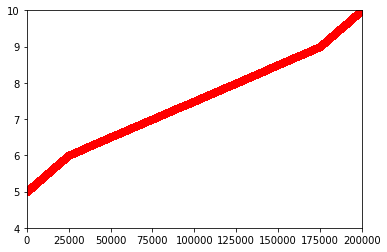

In [205]:
plt.plot(grades,'ro')
plt.axis([0, 200000, 4, 10])
plt.show()

In [206]:
grade_age = [(x.grade, x.age) for x in all_students]

In [207]:
x,y = zip(*grade_age)

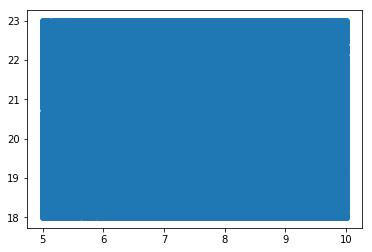

In [208]:
plt.scatter(x=x, y=y)

In [89]:
grade_age = list(filter(lambda x: x[1]/x[0] <2, grade_age))
x,y = zip(*grade_age)

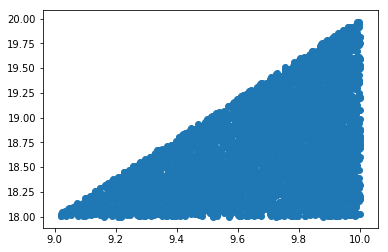

In [90]:
plt.scatter(x=x, y=y)

In [91]:
grade_age = list(filter(lambda x: x[1]/x[0] > 1.99, grade_age))
x,y = zip(*grade_age)

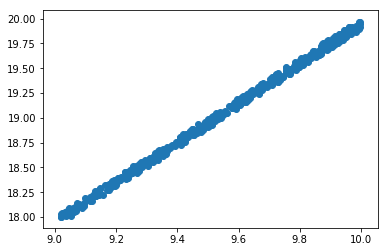

In [92]:
plt.scatter(x=x, y=y)